## SIGMA INTERNSHIP CODING CHALLENGE

#### GOAL : This exercise will help familiarize you with the Quantrocket platform and also test your coding & algorithms knowledge while giving you a flavor of how to set up a minimalist trading workflow

### Getting Started

### STEP 1:  Ensure you are able to pull price data (daily close prices only) for Apple stock (symbol=‘AAPL’) for the year 2023 (01-01-2023 to 12-31-2023). This should be available as part of their freely available us-stock price data.

In [1]:
#importing the necessary libraries
from pandas_datareader import data as web 
import pandas as pd 
import numpy as np 
from datetime import datetime 
import matplotlib.pyplot as plt

In [2]:
from quantrocket.license import set_license

In [3]:
set_license("5483cb34-de02-11ee-ab4a-958e78a02bc9")

{'licensekey': '5483........2bc9', 'software_license': {}}

In [4]:
from quantrocket.license import get_license_profile
get_license_profile(force_refresh=True)

{'licensekey': '5483........2bc9', 'software_license': {}}

In [5]:
!quantrocket license get --force-refresh

licensekey: 5483........2bc9
software_license: {}


In [1]:
#from quantrocket.history import drop_db
#drop_db("usstock-free-1d", confirm_by_typing_db_code_again="usstock-free-1d")

{'status': 'deleted quantrocket.v2.history.usstock-free-1d.sqlite'}

In [2]:
from quantrocket.history import create_usstock_db
create_usstock_db("usstock-free-1d", bar_size="1 day", free=True)

{'status': 'successfully created quantrocket.v2.history.usstock-free-1d.sqlite'}

In [20]:
from quantrocket.history import collect_history
collect_history("usstock-free-1d")

{'status': 'the historical data will be collected asynchronously'}

In [6]:
#pulling data
from quantrocket.master import get_securities
# by specifying sec_types='STK', we exclude ETFs, which are present in the sample data 
securities = get_securities(vendors="usstock", sec_types="STK")
securities.head()

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000B9XRY4,AAPL,XNAS,US,USD,STK,False,America/New_York,APPLE INC,1,1,False,NaT,NaT,NaT
FIBBG000BFWKC0,MON,XNYS,US,USD,STK,False,America/New_York,MONSANTO CO,1,1,True,2018-06-06,NaT,NaT
FIBBG000BKZB36,HD,XNYS,US,USD,STK,False,America/New_York,HOME DEPOT INC,1,1,False,NaT,NaT,NaT
FIBBG000BMHYD1,JNJ,XNYS,US,USD,STK,False,America/New_York,JOHNSON & JOHNSON,1,1,False,NaT,NaT,NaT
FIBBG000BPH459,MSFT,XNAS,US,USD,STK,False,America/New_York,MICROSOFT CORP,1,1,False,NaT,NaT,NaT


In [15]:
#from quantrocket.master import create_universe
#create_universe("usstock-free", sids=securities.index.tolist())

In [8]:
#getting specific APPLE data
aapl_row = securities[securities['Symbol'] == 'AAPL']
aapl_row

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000B9XRY4,AAPL,XNAS,US,USD,STK,False,America/New_York,APPLE INC,1,1,False,NaT,NaT,NaT


In [9]:
filtered_securities = securities[securities.Delisted==False]
# also limit the number of columns for readability
filtered_securities = filtered_securities[["Symbol", "Exchange", "Name", "Delisted"]]
filtered_securities.head()
filtered_aapl_row=filtered_securities[filtered_securities['Symbol'] == 'AAPL']
filtered_aapl_row

In [ ]:
#create_universe("usstock-free-active", sids=filtered_securities.index.tolist())

In [11]:
print(filtered_aapl_row.index)

Index(['FIBBG000B9XRY4'], dtype='object', name='Sid')


In [14]:
from quantrocket import get_prices
sid=filtered_aapl_row.index[0]
#extracting only closing prices of the year 2023 of APPLE
amt = get_prices("usstock-free-1d", sids=sid, start_date="2023-01-01", end_date="2023-12-31" ,fields=["Close"])
amt

Sid               FIBBG000B9XRY4
Field Date                      
Close 2023-01-03        124.2163
      2023-01-04        125.4975
      2023-01-05        124.1666
      2023-01-06        128.7352
      2023-01-09        129.2616
...                          ...
      2023-12-22        193.3533
      2023-12-26        192.8040
      2023-12-27        192.9038
      2023-12-28        193.3333
      2023-12-29        192.2846

[250 rows x 1 columns]

In [16]:
amt_reset = amt.reset_index()
new_dataframe = amt_reset[['Date', 'FIBBG000B9XRY4']]
new_dataframe.set_index('Date', inplace=True)
new_dataframe

df=new_dataframe

Sid,FIBBG000B9XRY4
Date,
2023-01-03,124.2163
2023-01-04,125.4975
2023-01-05,124.1666
2023-01-06,128.7352
2023-01-09,129.2616
...,...
2023-12-22,193.3533
2023-12-26,192.8040
2023-12-27,192.9038


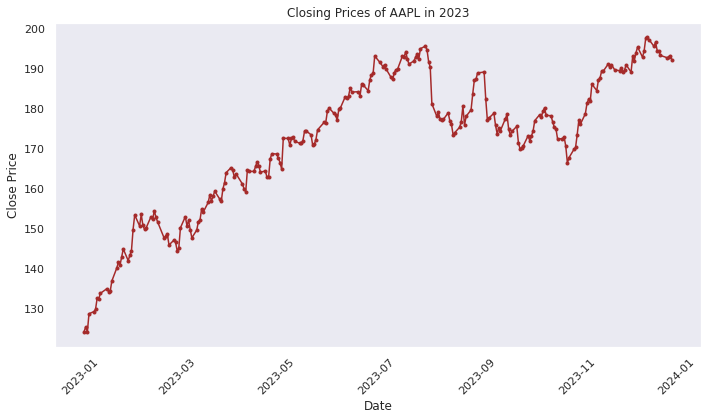

In [17]:
#plot of closing prices of AAPL in 2023

plt.figure(figsize=(10, 6), facecolor='white')  # You can change 'lightgrey' to any color you prefer
plt.plot(new_dataframe.index, new_dataframe['FIBBG000B9XRY4'], marker='.', color='brown', linestyle='-')
plt.title('Closing Prices of AAPL in 2023')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()


#### STEP 1 COMPLETED

## Daily Stock Trading Prompt

#### Objective is to build a simple model to make decisions on certain days using the below pre-specified logic

#### The below code is to check the expected annual return and annual risk 

In [21]:
weight=np.array([1])

In [63]:
#calculate returns
r=df.pct_change()
print("RETURNS : ", r)
print("-----------------------------------------------------------")

#calculate covariance
cov_matrix= r.cov() * 252  #252- trading days in a year
print("COVARIANCE MATRIX : ", cov_matrix)

print("-----------------------------------------------------------")

#calculate portfolio variance
portfolio_matrix=np.dot(weight.T,np.dot(cov_matrix,weight))
print("PORTFOLIO VARIANCE : ", portfolio_matrix)

print("-----------------------------------------------------------")

#calculate portfolio volatility/ standard deviation
portfolio_volatility=np.sqrt( portfolio_matrix)
print("PORTFOLIO VOLATILITY : ", portfolio_volatility)

print("-----------------------------------------------------------")

#calculate annual portfolio return
portfolio_return=np.sum(r.mean()*weight)*252 #252 annual trading days
print("PORTFOLIO RETURN_ANNUAL : ", portfolio_return)

#Show the expected annual return, volatility (risk), and variance
percent_var = str(round(portfolio_matrix, 2) *100) + '%'
percent_vols = str(round(portfolio_volatility, 2) *100)+ '%'
percent_ret = str(round(portfolio_return, 2) *100) + '%'
print("-----------------------------------------------------------")
print("-----------------------------------------------------------")
print('Expected annual return : ', percent_ret)
print('Annual risk            : ', percent_vols)
print('Annual variance        : ', percent_var)
print("-----------------------------------------------------------")
print("-----------------------------------------------------------")

RETURNS :  Sid         FIBBG000B9XRY4
Date                      
2023-01-03             NaN
2023-01-04        0.010314
2023-01-05       -0.010605
2023-01-06        0.036794
2023-01-09        0.004089
...                    ...
2023-12-22       -0.005547
2023-12-26       -0.002841
2023-12-27        0.000518
2023-12-28        0.002226
2023-12-29       -0.005424

[250 rows x 1 columns]
-----------------------------------------------------------
COVARIANCE MATRIX :  Sid             FIBBG000B9XRY4
Sid                           
FIBBG000B9XRY4        0.039816
-----------------------------------------------------------
PORTFOLIO VARIANCE :  0.0398164650843007
-----------------------------------------------------------
PORTFOLIO VOLATILITY :  0.1995406351706356
-----------------------------------------------------------
PORTFOLIO RETURN_ANNUAL :  0.4624009546177674
-----------------------------------------------------------
-----------------------------------------------------------
Expected a

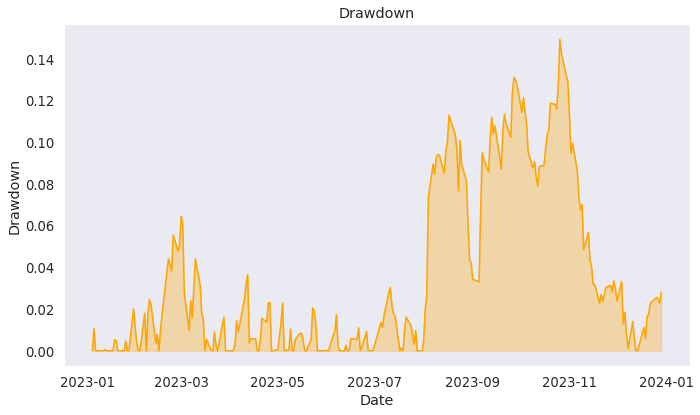

In [69]:
# Calculate drawdown
cumulative_returns = (1 + r).cumprod()
drawdown = (cumulative_returns.cummax() - cumulative_returns) / cumulative_returns.cummax()

plt.figure(figsize=(10, 6))
plt.plot(drawdown.index, drawdown, color='orange')
plt.fill_between(drawdown.index, drawdown.values.flatten(), color='orange', alpha=0.3)
plt.title('Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(False)
plt.tight_layout()
plt.show()


### Annual return and risk computed manually 

### TASK 1 :  Let for a day d in [1,2,,,,N], p(d) represent the close price of that day. We want to build a model to decide whether to place a buy order trade for the day d+1 to maximize the portfolio value. Let r(d) be the % returns on day d. That is, r(d) = (p(d)- p(d-1))/p(d-1).

In [30]:
from quantrocket import get_prices

all_prices = []

for sid in filtered_aapl_row.index:
    
    prices = get_prices("usstock-free-1d", sids=sid, start_date="2023-01-01", end_date="2023-12-31" ,fields=["Close"])
    close_prices = prices.loc['Close'][sid].tolist()
    all_prices.append(close_prices)

for sid_prices in all_prices:
    print(sid_prices)


Index(['FIBBG000B9XRY4'], dtype='object', name='Sid')
[124.2163, 125.4975, 124.1666, 128.7352, 129.2616, 129.8377, 132.5788, 132.4994, 133.8402, 135.0121, 134.2871, 134.3467, 136.9289, 140.1468, 141.5571, 140.8917, 142.9774, 144.9339, 142.0239, 143.3051, 144.4373, 149.7905, 153.4454, 150.6943, 153.5944, 150.883, 149.8402, 150.2082, 153.0332, 152.3866, 154.5053, 152.8939, 151.7401, 147.6917, 148.1194, 148.6068, 145.9311, 147.1346, 146.6273, 144.5385, 145.1353, 150.2281, 153.0133, 150.7951, 152.0584, 149.7905, 147.7116, 149.6711, 151.7798, 152.1777, 155.0225, 154.177, 156.5643, 158.4343, 156.992, 158.0862, 159.3992, 157.4396, 156.813, 159.9164, 161.498, 164.0245, 165.2877, 164.7506, 162.8905, 163.7858, 161.1697, 159.9463, 159.25, 164.681, 164.3328, 164.3527, 165.5861, 166.74, 165.7652, 164.1438, 164.4522, 162.9005, 162.8905, 167.5158, 168.7791, 168.6896, 167.6452, 166.5609, 164.9098, 172.6485, 172.5788, 170.858, 172.6335, 172.8275, 171.8912, 171.3932, 171.3932, 172.0107, 174.3614, 174.47

In [31]:
returns = []

for i in range(1, len(sid_prices)):
    daily_return = ((sid_prices[i] - sid_prices[i - 1]) / sid_prices[i - 1])
    returns.append(daily_return)

print(returns)

[0.010314266324145852, -0.010604992131317355, 0.036794113714960296, 0.004089013727403191, 0.0044568533887869655, 0.02111174181304805, -0.0005988891134932025, 0.010119291106223888, 0.008755964202085723, -0.005369889069201903, 0.00044382520733554447, 0.019220420002873165, 0.02350051742181537, 0.010063019633698222, -0.004700576657758638, 0.014803568982417012, 0.013683980824941603, -0.02007811836982236, 0.009021016885186315, 0.00790062600702964, 0.037062448550339945, 0.02440007877669143, -0.017928852868838087, 0.01924492167255171, -0.017652987348497063, -0.006911315390070449, 0.002455949738454667, 0.018807228899620585, -0.004225226944218683, 0.01390345345325651, -0.010429415689947227, -0.007546409634393457, -0.02667982952429855, 0.002895897332077671, 0.003290588538705798, -0.01800523260039249, 0.008247042611205012, -0.003447863384955102, -0.014245641841594247, 0.004129003691058104, 0.035090016005754704, 0.018539807133285815, -0.014496779038162017, 0.008377593171130994, -0.01491466436579628

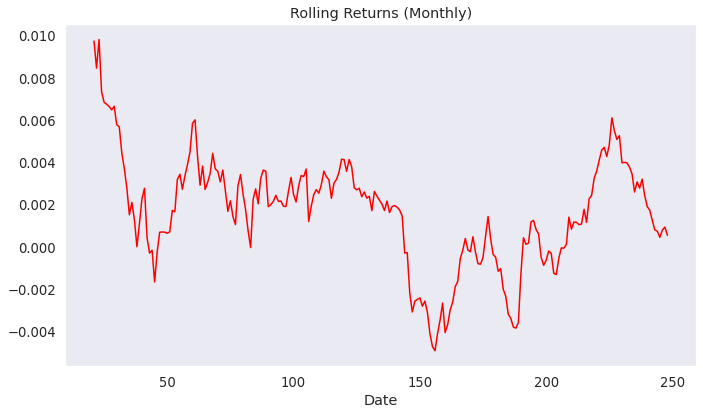

In [70]:
returns_series = pd.Series(returns)
rolling_window = 22  # 22 TRADING DAYS IN A MONTH
rolling_returns = returns_series.rolling(window=rolling_window).mean()

plt.figure(figsize=(10, 6))
plt.plot(rolling_returns.index, rolling_returns, color='red')
plt.title('Rolling Returns (Monthly)')
plt.xlabel('Date')
plt.grid(False)
plt.tight_layout()
plt.show()


### TASK 2 : STATE CLASSIFICATION 

### if r(d) >= 0.01, s(d) = +1
###  else if r(d) >-0.01, s(d) = 0
###  else, s(d) =-1

In [66]:
state = []
for return_value in returns:
    if return_value >= 0.01:
        state.append(1)  
    elif return_value > -0.01:
        state.append(0)  
    else:
        state.append(-1) 
print(state)

[1, -1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, -1, 0, 0, 1, 1, -1, 1, -1, 0, 0, 1, 0, 1, -1, 0, -1, 0, 0, -1, 0, 0, -1, 0, 1, 1, -1, 0, -1, -1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, -1, 0, 1, 0, 1, 0, 0, -1, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 1, -1, 1, 0, 1, 1, 0, 0, 0, -1, -1, 0, 0, -1, -1, 0, 0, 1, 0, -1, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, -1, -1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, -1, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]


### TASK 3 : CLASSES : BEAR, BULL, FLAT 

###  That is, depending on whether the returns on day d are high, medium or low, we classify the state as Bull (+1), Flat (0) or Bear (-1).

['Bull', 'Bear', 'Bull', 'Flat', 'Flat', 'Bull', 'Flat', 'Bull', 'Flat', 'Flat', 'Flat', 'Bull', 'Bull', 'Bull', 'Flat', 'Bull', 'Bull', 'Bear', 'Flat', 'Flat', 'Bull', 'Bull', 'Bear', 'Bull', 'Bear', 'Flat', 'Flat', 'Bull', 'Flat', 'Bull', 'Bear', 'Flat', 'Bear', 'Flat', 'Flat', 'Bear', 'Flat', 'Flat', 'Bear', 'Flat', 'Bull', 'Bull', 'Bear', 'Flat', 'Bear', 'Bear', 'Bull', 'Bull', 'Flat', 'Bull', 'Flat', 'Bull', 'Bull', 'Flat', 'Flat', 'Flat', 'Bear', 'Flat', 'Bull', 'Flat', 'Bull', 'Flat', 'Flat', 'Bear', 'Flat', 'Bear', 'Flat', 'Flat', 'Bull', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Bull', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Bull', 'Flat', 'Flat', 'Bull', 'Flat', 'Flat', 'Flat', 'Flat', 'Flat', 'Bull', 'Flat', 'Flat', 'Bear', 'Flat', 'Flat', 'Bull', 'Bull', 'Flat', 'Bull', 'Flat', 'Flat', 'Flat', 'Flat', 'Bull', 'Flat', 'Bull', 'Flat', 'Flat', 'Bull', 'Flat', 'Flat', 'Flat', 'Bull', 'Flat', 'Flat', 'Bull', 'Flat', 'Flat', 'Bull', 'Flat', 'Flat',

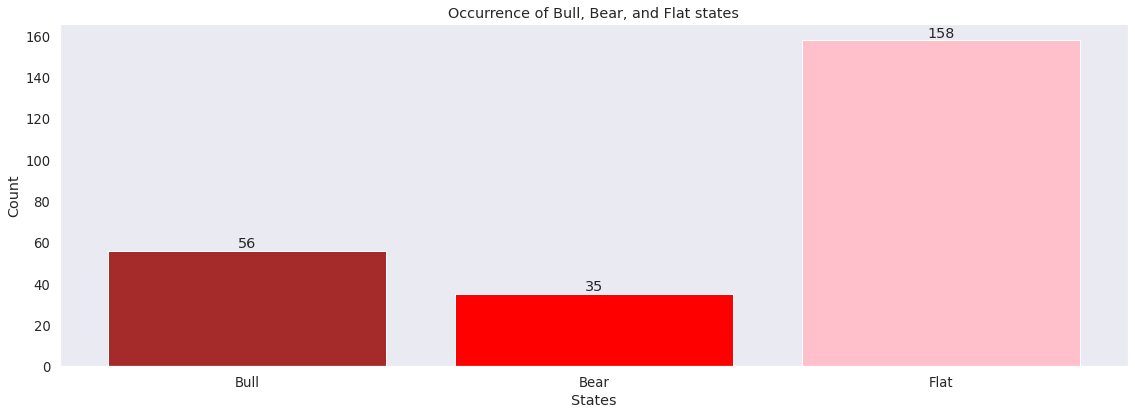

In [71]:
ans=[]
for i in state:
    #print("state : ", i)
    if(i==1):
        ans.append("Bull")
    elif(i==0):
        ans.append("Flat")
    elif(i==-1):
        ans.append("Bear")
        
print(ans)  

bull= ans.count('Bull')
bear= ans.count('Bear')
flat= ans.count('Flat')
print(" BEAR : ", bear , " BULL : ", bull , " FLAT : ", flat)
      
categories = ["Bull", "Bear", "Flat"]
counts = [bull, bear, flat]
plt.bar(categories, counts, color=['brown', 'red', 'pink'])

for i in range(len(categories)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

plt.xlabel('States')
plt.ylabel('Count')
plt.title('Occurrence of Bull, Bear, and Flat states')
plt.grid(False)
plt.tight_layout()

### TASK 4 :  Assuming we decide to place a buy order trade for the day d+1,
### if s(d+1) = 1 & s(d) = 0, then V(d+1) = V(d) + 1
### else if s(d+1) =-1 & s(d) = 0, then V(d+1) = V(d)-1 and V(d+1) = V(d) in all other cases (including when we decide not to place a buy order trade for the day d+1).
 ### That is on day d+1, assuming we executed a buy, our portfolio value increases by 1 if the observed returns for d+1 is in the Bull state, decreases by 1 if it is in the Bear state, and stays unchanged for all other scenarios

In [73]:
V = 0
portfolio_values = []

for i in range(1, len(state)):
    if state[i] == 1 and state[i - 1] == 0:
        V += 1  
    elif state[i] == -1 and state[i - 1] == 0:
        V -= 1  
    else:
        pass 
    portfolio_values.append(V)
print("-----------------------------------------------------------")
print("Portfolio values for each day:", portfolio_values)
print("-----------------------------------------------------------")
print("Final portfolio value:", V)
print("-----------------------------------------------------------")


-----------------------------------------------------------
Portfolio values for each day: [0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 6, 6, 6, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 7, 7, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 17, 17, 17, 16, 16, 16, 16, 16, 16, 17, 17, 17, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 18, 18, 17, 17, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17]
-----------

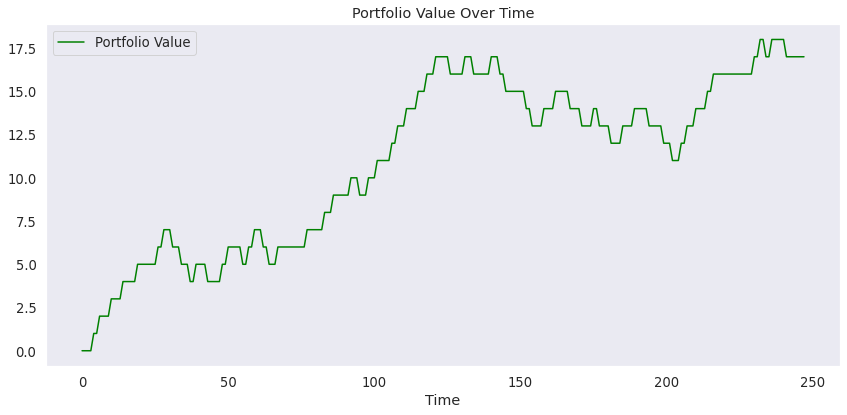

In [72]:
# Plot Portfolio Value Over Time

plt.figure(figsize=(12, 6))
plt.plot(range(len(portfolio_values)), portfolio_values, color='green', label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()

### TASK 5 :  Now based on the previous observations [1,..,d], you can calculate the probability distribution of going from the state s(d) to different possible states

In [74]:
transition_counts = {}
portfolio_value = 0
optimal_buy_indices = []


for i in range(1, len(state)):
    prev_state = state[i - 1]
    curr_state = state[i]
    transition_counts[(prev_state, curr_state)] = transition_counts.get((prev_state, curr_state), 0) + 1

    if curr_state == 1 and prev_state == 0:
        portfolio_value += 1
        optimal_buy_indices.append(i)  
    elif curr_state == -1 and prev_state == 0:
        portfolio_value -= 1
        optimal_buy_indices.append(i)  

total_transitions = sum(transition_counts.values())

transition_probabilities = {}
for transition, count in transition_counts.items():
    transition_probabilities[transition] = count / total_transitions
print("-----------------------------------------------------------")
print("Transition Probabilities:")
for transition, probability in transition_probabilities.items():
    print(f"Transition: {transition}, Probability: {probability}")

print("-----------------------------------------------------------")
print("Final Portfolio Value:", portfolio_value)
print("-----------------------------------------------------------")
print("Optimal Buy Indices:", optimal_buy_indices)
print("-----------------------------------------------------------")

buy_dates = pd.to_datetime(df.index[optimal_buy_indices])
buy_dates_list = [date.date() for date in buy_dates]
print("-----------------------------------------------------------")
print("Corresponding dates for buy indices:")
for date in buy_dates_list:
    print(date)
print("-----------------------------------------------------------")

-----------------------------------------------------------
Transition Probabilities:
Transition: (1, -1), Probability: 0.028225806451612902
Transition: (-1, 1), Probability: 0.016129032258064516
Transition: (1, 0), Probability: 0.1532258064516129
Transition: (0, 0), Probability: 0.3790322580645161
Transition: (0, 1), Probability: 0.16129032258064516
Transition: (1, 1), Probability: 0.04435483870967742
Transition: (-1, 0), Probability: 0.10483870967741936
Transition: (0, -1), Probability: 0.09274193548387097
Transition: (-1, -1), Probability: 0.020161290322580645
-----------------------------------------------------------
Final Portfolio Value: 17
-----------------------------------------------------------
Optimal Buy Indices: [5, 7, 11, 15, 20, 27, 29, 32, 35, 38, 40, 44, 49, 51, 56, 58, 60, 63, 65, 68, 78, 84, 87, 93, 96, 99, 102, 107, 109, 112, 116, 119, 122, 127, 132, 135, 141, 144, 146, 153, 155, 159, 163, 168, 172, 176, 178, 182, 186, 190, 195, 200, 203, 206, 208, 211, 215, 217, 

In [75]:
states = [1, 0, -1]
transition_keys = [(prev_state, curr_state) for prev_state in states for curr_state in states]

probability_matrix = []

for prev_state in states:
    row = []
    for curr_state in states:
        transition_key = (prev_state, curr_state)
        if transition_key in transition_probabilities:
            row.append(transition_probabilities[transition_key])
        else:
            row.append(0)
    probability_matrix.append(row)
print("-----------------------------------------------------------")
print("Probability Matrix:")
for row in probability_matrix:
    print(row)
print("-----------------------------------------------------------")

-----------------------------------------------------------
Probability Matrix:
[0.04435483870967742, 0.1532258064516129, 0.028225806451612902]
[0.16129032258064516, 0.3790322580645161, 0.09274193548387097]
[0.016129032258064516, 0.10483870967741936, 0.020161290322580645]
-----------------------------------------------------------


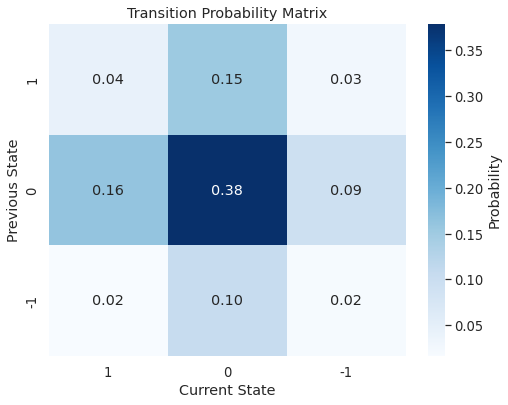

In [46]:
import seaborn as sns

matrix_array = np.array(probability_matrix)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  

sns.heatmap(matrix_array, annot=True, cmap="Blues", fmt=".2f", xticklabels=states, yticklabels=states, cbar_kws={'label': 'Probability'})

plt.xlabel('Current State')
plt.ylabel('Previous State')
plt.title('Transition Probability Matrix')

plt.show()

### All the steps provided in the goal is completed.

### Using inbuilt functions, Calculating expected annual returns, annual risk 

In [47]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [48]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [78]:
#PORTFOLIO OPTIMIZATION

mu = expected_returns.mean_historical_return(df)
print(mu)
S= risk_models.sample_cov(df)

ef =  EfficientFrontier(mu, S)

weights =  ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print("-----------------------------------------------------------")
print(cleaned_weights)
print("-----------------------------------------------------------")
ef.portfolio_performance(verbose =  True)
print("-----------------------------------------------------------")

Sid
FIBBG000B9XRY4    0.556153
dtype: float64
-----------------------------------------------------------
OrderedDict([('FIBBG000B9XRY4', 1.0)])
-----------------------------------------------------------
Expected annual return: 55.6%
Annual volatility: 20.0%
Sharpe Ratio: 2.69
-----------------------------------------------------------


In [79]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_prices, total_portfolio_value=15000)
allocation , leftover = da.lp_portfolio()
print("-----------------------------------------------------------")
print("Discrete Allocation : ", allocation)
print("-----------------------------------------------------------")
print("Funds remaining : ",leftover)
print("-----------------------------------------------------------")

-----------------------------------------------------------
Discrete Allocation :  {'FIBBG000B9XRY4': 78}
-----------------------------------------------------------
Funds remaining :  1.8011895830150024
-----------------------------------------------------------


# MODEL BUILDING

### BUILT ARIMA MODEL FOR FORECASTING 

In [51]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [80]:
time_series = df['FIBBG000B9XRY4']
model = ARIMA(time_series, order=(1, 1, 18))
results = model.fit()

forecast_steps = 20
forecast_values = results.get_forecast(steps=forecast_steps).predicted_mean

print('Forecast values:')
print(forecast_values)

last_date = time_series.index[-1]
freq = time_series.index.freq  
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq=freq)
forecast_series = pd.Series(forecast_values, index=forecast_dates[1:])

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecast values:
250    191.888127
251    191.211845
252    191.481128
253    192.198830
254    191.489577
255    190.813833
256    190.817635
257    191.169588
258    191.613710
259    191.444992
260    191.766427
261    191.454588
262    191.940278
263    191.731202
264    192.003942
265    191.894351
266    191.892079
267    191.859704
268    191.881246
269    191.866912
Name: predicted_mean, dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


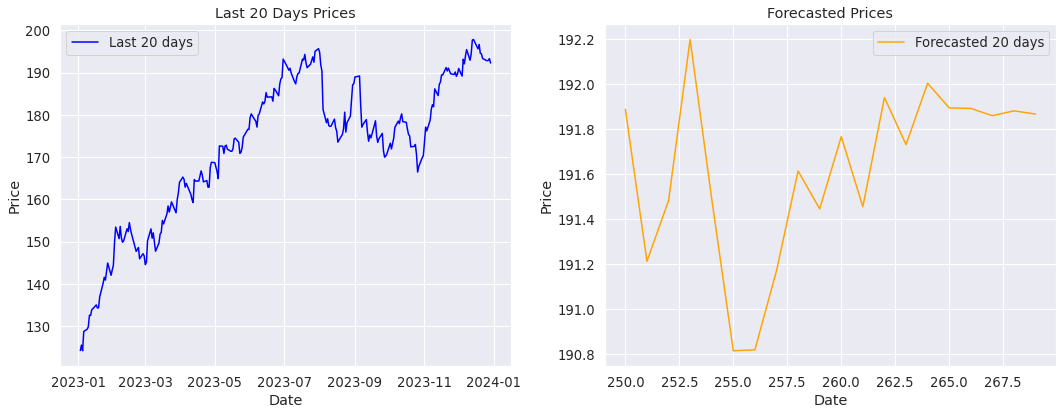

In [81]:

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(time_series.index, time_series, label='Last 20 days', color='blue')
plt.title('Last 20 Days Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(forecast_values, label='Forecasted 20 days', color='orange')
plt.title('Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

### BACKTESTING 

In [88]:
import pandas as pd

# Given DataFrame containing closing prices of AAPL for the year 2023
# Assuming the DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame if different
# Assuming the DataFrame has 'Date' as the index and 'FIBBG000B9XRY4' as the column containing closing prices
# Adjust column names accordingly if different

# Calculate percentage returns
df['Returns'] = df['FIBBG000B9XRY4'].pct_change()

# Function to classify states
def classify_state(returns):
    if returns >= 0.01:
        return 1  # Bull
    elif returns > -0.01:
        return 0  # Flat
    else:
        return -1  # Bear

# Apply state classification
df['State'] = df['Returns'].apply(classify_state)

# Simulate trading strategy
portfolio_value = 0
trade_signals = []

# Iterate through historical data
for index, row in df.iterrows():
    # Place buy order based on trading strategy
    if row['State'] == 1:
        portfolio_value += 1
        trade_signals.append('Buy')
    elif row['State'] == -1:
        portfolio_value -= 1
        trade_signals.append('Sell')
    else:
        trade_signals.append('Hold')

# Print results
print("Final Portfolio Value:", portfolio_value)
print("Trade Signals:", trade_signals)


Final Portfolio Value: 20
Trade Signals: ['Sell', 'Buy', 'Sell', 'Buy', 'Hold', 'Hold', 'Buy', 'Hold', 'Buy', 'Hold', 'Hold', 'Hold', 'Buy', 'Buy', 'Buy', 'Hold', 'Buy', 'Buy', 'Sell', 'Hold', 'Hold', 'Buy', 'Buy', 'Sell', 'Buy', 'Sell', 'Hold', 'Hold', 'Buy', 'Hold', 'Buy', 'Sell', 'Hold', 'Sell', 'Hold', 'Hold', 'Sell', 'Hold', 'Hold', 'Sell', 'Hold', 'Buy', 'Buy', 'Sell', 'Hold', 'Sell', 'Sell', 'Buy', 'Buy', 'Hold', 'Buy', 'Hold', 'Buy', 'Buy', 'Hold', 'Hold', 'Hold', 'Sell', 'Hold', 'Buy', 'Hold', 'Buy', 'Hold', 'Hold', 'Sell', 'Hold', 'Sell', 'Hold', 'Hold', 'Buy', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Buy', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Buy', 'Hold', 'Hold', 'Buy', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Buy', 'Hold', 'Hold', 'Sell', 'Hold', 'Hold', 'Buy', 'Buy', 'Hold', 'Buy', 'Hold', 'Hold', 'Hold', 'Hold', 'Buy', 'Hold', 'Buy', 'Hold', 'Hold', 'Buy', 'Hold', 'Hold', 'Hold', 'Buy', 'Hold', 'Hold', 'Buy', 'Hold', 'Hold', 'Buy', 'Ho

## Hence successfully completed the hackathon, and the requirements